## Exploratory Data Analysis on Indian Judiciary Data

In [1]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
cases_2016 = pd.read_csv("/nlsasfs/home/ttbhashini/prathosh/divyanshu/PreCog/data/case/cases_2016.csv")
cases_2017 = pd.read_csv("/nlsasfs/home/ttbhashini/prathosh/divyanshu/PreCog/data/case/cases_2017.csv")
cases_2018 = pd.read_csv("/nlsasfs/home/ttbhashini/prathosh/divyanshu/PreCog/data/case/cases_2018.csv")

In [5]:
state_key = pd.read_csv("/nlsasfs/home/ttbhashini/prathosh/divyanshu/PreCog/data/keys/cases_state_key.csv")

In [6]:
mapper = dict(zip(state_key.state_code,state_key.state_name))

In [7]:
mapper

{2: 'Andhra Pradesh',
 29: 'Telangana',
 6: 'Assam',
 8: 'Bihar',
 27: 'Chandigarh',
 18: 'Chhattisgarh',
 32: 'DNH at Silvasa',
 31: 'Diu and Daman',
 30: 'Goa',
 17: 'Gujarat',
 14: 'Haryana',
 5: 'Himachal Pradesh',
 33: 'Ladakh',
 12: 'Jammu and Kashmir',
 7: 'Jharkhand',
 3: 'Karnataka',
 4: 'Kerala',
 23: 'Madhya Pradesh',
 1: 'Maharashtra',
 25: 'Manipur',
 21: 'Meghalaya',
 19: 'Mizoram',
 26: 'Delhi',
 11: 'Orissa',
 22: 'Punjab',
 9: 'Rajasthan',
 24: 'Sikkim',
 10: 'Tamil Nadu',
 20: 'Tripura',
 13: 'Uttar Pradesh',
 15: 'Uttarakhand',
 16: 'West Bengal'}

In [8]:
cases_2016['state_name'] = cases_2016['state_code'].map(mapper)
cases_2017['state_name'] = cases_2017['state_code'].map(mapper)
cases_2018['state_name'] = cases_2018['state_code'].map(mapper)

In [9]:
cases_2016.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11349260 entries, 0 to 11349259
Data columns (total 20 columns):
 #   Column             Dtype  
---  ------             -----  
 0   ddl_case_id        object 
 1   year               int64  
 2   state_code         int64  
 3   dist_code          int64  
 4   court_no           int64  
 5   cino               object 
 6   judge_position     object 
 7   female_defendant   object 
 8   female_petitioner  object 
 9   female_adv_def     int64  
 10  female_adv_pet     int64  
 11  type_name          float64
 12  purpose_name       float64
 13  disp_name          int64  
 14  date_of_filing     object 
 15  date_of_decision   object 
 16  date_first_list    object 
 17  date_last_list     object 
 18  date_next_list     object 
 19  state_name         object 
dtypes: float64(2), int64(7), object(11)
memory usage: 1.7+ GB


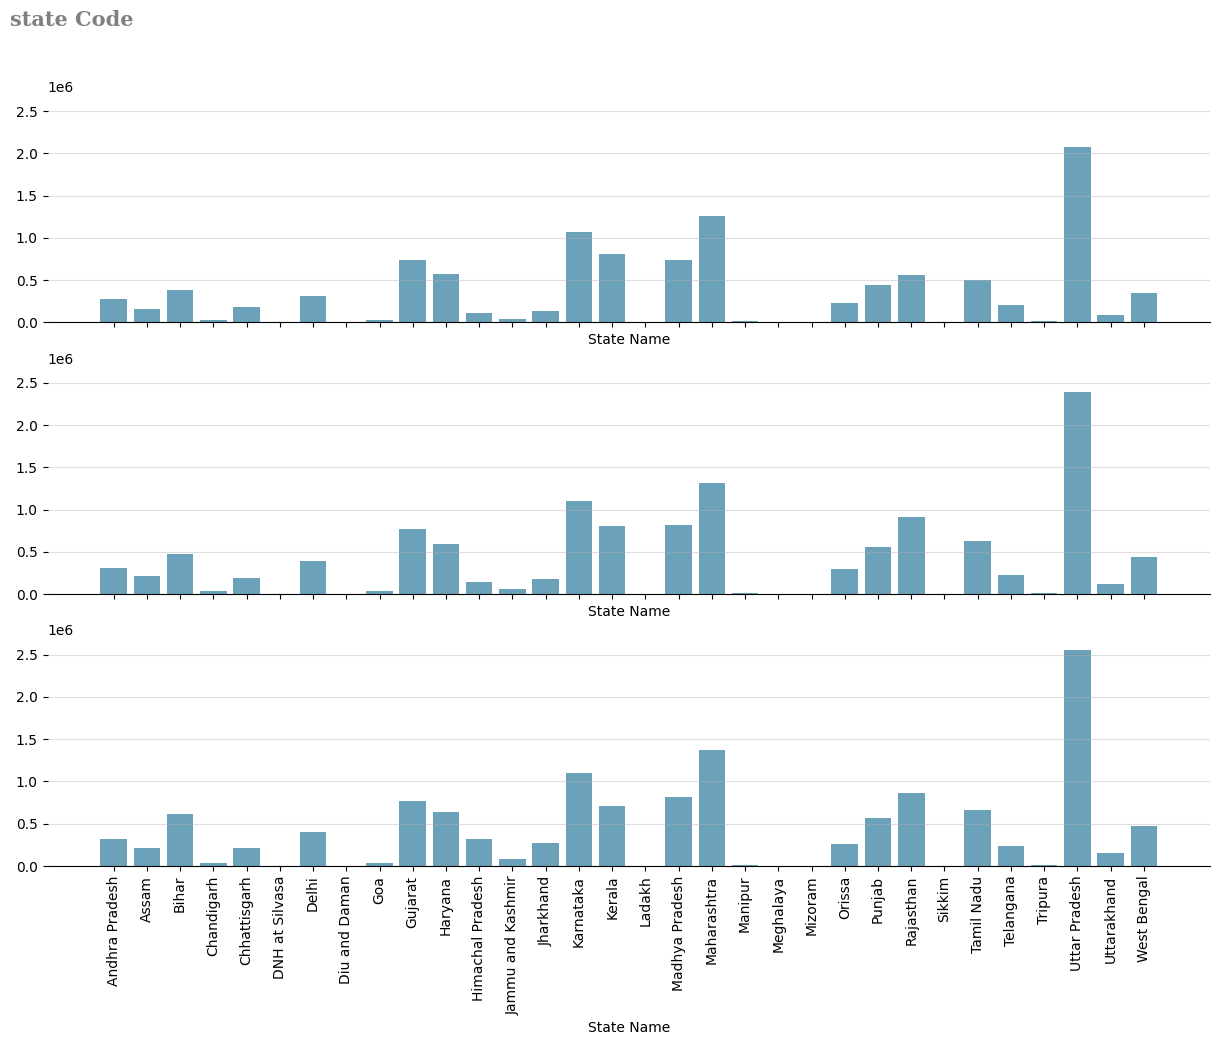

In [11]:
fig, ax = plt.subplots(3,sharex=True, sharey=True,figsize=(15, 10))
data = cases_2016['state_name'].value_counts().sort_index()
ax[0].bar(data.index, data.values, 
       color='#6ca1ba',
       linewidth=0.2)

for s in ['top', 'left', 'right']:
    ax[0].spines[s].set_visible(False)

ax[0].set_xlabel("State Name")

ax[0].grid(axis='y', linestyle='-', alpha=0.4) 
 
data = cases_2017['state_name'].value_counts().sort_index()
ax[1].bar(data.index, data.values, 
       color='#6ca1ba',
       linewidth=0.2)

for s in ['top', 'left', 'right']:
    ax[1].spines[s].set_visible(False)

ax[1].set_xlabel("State Name")

ax[1].grid(axis='y', linestyle='-', alpha=0.4) 

data = cases_2018['state_name'].value_counts().sort_index()
ax[2].bar(data.index, data.values, 
       color='#6ca1ba',
       linewidth=0.2)

for s in ['top', 'left', 'right']:
    ax[2].spines[s].set_visible(False)

ax[2].set_xlabel("State Name")

fig.text(0.1, 0.95, 'state Code ', fontsize=15, fontweight='bold', fontfamily='serif',color='gray')    
ax[2].grid(axis='y', linestyle='-', alpha=0.4)


plt.xticks(rotation= 90) 
plt.show()

In [12]:
reported_crime_df = pd.concat([cases_2018.year.value_counts(),cases_2017.year.value_counts(),cases_2016.year.value_counts()]).to_frame()
reported_crime_df.reset_index(level=0,inplace=True)
reported_crime_df.rename(columns={'index':'Year','year':'Crime Reported'},inplace=True)
# reported_crime = reported_crimep_df

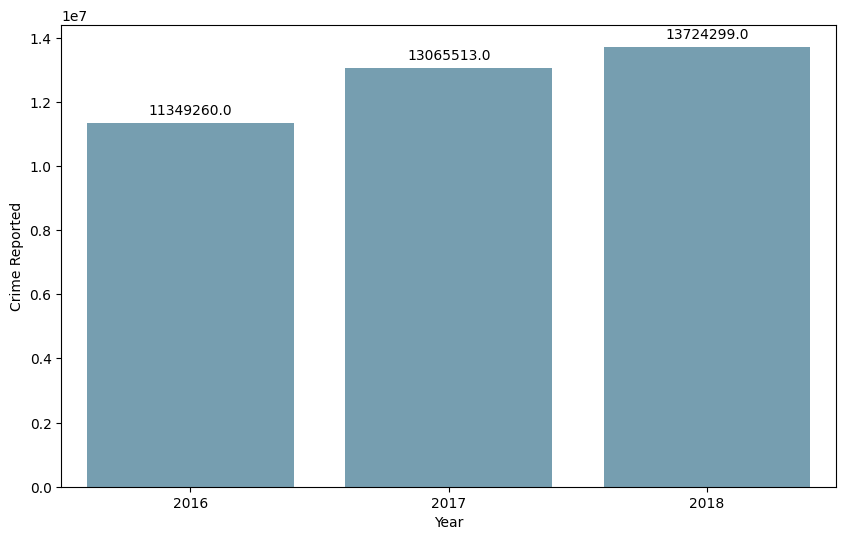

In [13]:
plt.figure(figsize=(10, 6))
splot=sns.barplot(x="Year",y="Crime Reported",data=reported_crime_df,color='#6ca1ba')
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')


In [44]:
case_type = pd.read_csv("/nlsasfs/home/ttbhashini/prathosh/divyanshu/PreCog/data/keys/type_name_key.csv")

In [45]:
case_type.columns

Index(['year', 'type_name', 'type_name_s', 'count'], dtype='object')

In [46]:
case_type.shape

(62714, 4)

In [47]:
case_type.dropna(inplace=True)

In [48]:
case_type.year.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018])

In [49]:
case_type =  case_type.loc[lambda typ: typ['year']>=2016]

In [50]:
case_type.shape

(22471, 4)

In [51]:
case_mapper = dict(zip(case_type.type_name,case_type.type_name_s))

In [52]:
len(case_mapper)

7556

In [53]:
cases_2016['type_name_s'] = cases_2016['type_name'].map(case_mapper)
cases_2017['type_name_s'] = cases_2017['type_name'].map(case_mapper)
cases_2018['type_name_s'] = cases_2018['type_name'].map(case_mapper)

In [56]:
cases_2016.type_name_s.value_counts()

caisa                       895703
cri reg                     479564
bm                          426120
s r                         378482
spl.case(kptcl)             340984
                             ...  
st (lg)                          1
ndps. special case               1
app                              1
crl misc application (h)         1
civil appeal(b)                  1
Name: type_name_s, Length: 7382, dtype: int64

In [57]:
cases_2017.type_name_s.value_counts()

cc rly                        899445
cri. appeal.                  537523
c.b.i                         467102
s.s.t./ (pocso act.)          415994
cr. org.                      370435
                               ...  
complaint case(excise act)         1
summary cases                      1
mp                                 1
bail appln  mseb                   1
caveat misc case                   1
Name: type_name_s, Length: 7534, dtype: int64

In [58]:
cases_2018.type_name_s.value_counts()

cc                    900758
cri. case             535954
c.c.                  452349
s.c.c.                439693
cr. reg. case         350840
                       ...  
pus446crpc                 1
suit for injuction         1
ndps s. case s.            1
ieso lc                    1
p.a.ex                     1
Name: type_name_s, Length: 7533, dtype: int64